In [1]:
import Modules.SQcircuit_extensions as sq_ext
import Modules.figures as figs
import SQcircuit as sq
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import importlib

%matplotlib ipympl
plt.rcParams['text.usetex'] = False
importlib.reload(sq_ext)
importlib.reload(sq)
importlib.reload(figs)
np.set_printoptions(linewidth=300, formatter={'float': '{:.12f}'.format})
# np.set_printoptions(linewidth=200, formatter={'float': '{:.1e}'.format})

In [2]:
nH = 1e-9
fF = 1e-15
GHz = 1e9

In [3]:
h    = 6.626e-34
GHz = 1e9
e0   = 1.602e-19
Φ_0 = h/(2*e0)

In [36]:
# Circuit parameters
Csh = 15
C   = 15
CJ  = 3
Lq  = 25
Lr  = 10
Δ   = 0.1
EJ = 50
l = Lq*(Lq+4*Lr) - 4*Δ**2

In [37]:
Cf = C/2 + Csh + CJ
Lf = l/(Lq+4*Lr)

C_f = Cf * fF
L_f = Lf * nH
E_J = EJ * GHz

In [38]:
E_L_f = (Φ_0/(2*np.pi))**2/L_f / h
E_L_f

6539994179.227587

In [39]:
# EJ_values = np.geomspace(1e-1,100,200)
# fluxonium_vs_EJ = [ sq_ext.sq_fluxonium(EJ=EJ_i) for EJ_i in EJ_values]
# [fluxonium.diag(2) for fluxonium in fluxonium_vs_EJ];

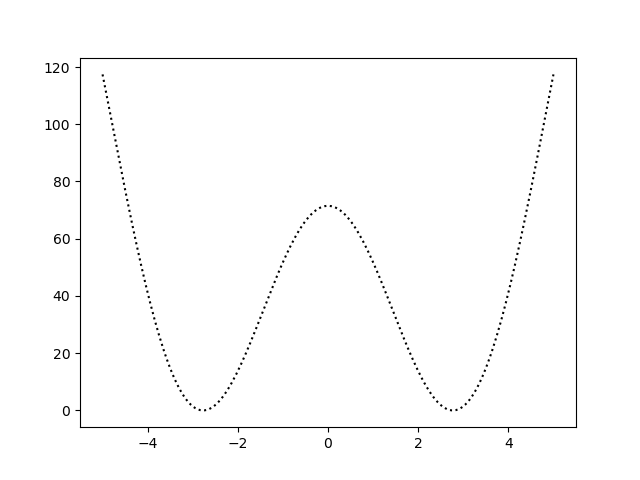

In [40]:
φ_f = np.linspace(-5,5,200)
φ_ext = np.pi
# φ_ext = 0
V_f = 0.5 * E_L_f * (φ_f)**2 - EJ*GHz * np.cos(φ_f-φ_ext)
# dVdφ = E_L_f * φ_f + 10*GHz * np.sin(φ_f + np.pi)
fig, ax = plt.subplots()
ax.plot(φ_f, (V_f-V_f.min())/1e9, 'k:')#, label = r'$\frac{1}{2}E_{L_{F}}\varphi_F^2 - E_J\cos(\varphi_F-\varphi_{ext})$')
# ax.plot(φ_f, dVdφ/1e9, 'k:')#, label = r'$\frac{1}{2}E_{L_{F}}\varphi_F^2 - E_J\cos(\varphi_F-\varphi_{ext})$')
fig.show()

In [179]:
q_r_limit = np.sqrt(0.5*np.sqrt(C_f/L_f))
q_r_limit

0.02247179258788244

In [180]:
Φ_r_limit = np.sqrt(0.5*np.sqrt(L_f/C_f))
Φ_r_limit

22.250116364531465

In [181]:
φ_min_vs_EJ = []
for EJ_i in EJ_values:
    V =  lambda φ: E_L_f*φ**2/2 - EJ_i*GHz*np.cos(φ+np.pi)
    φ_min = sp.optimize.minimize_scalar(V).x
    φ_min_vs_EJ.append(φ_min)
    print(φ_min)

1.023201471523131e-09
9.308788676725875e-11
1.9245092640159356e-11
-9.471089327120635e-10
1.9416712028089684e-10
4.162983460380953e-10
1.8628472805206034e-11
-2.2577031382076785e-10
1.7249669810042647e-11
2.1129969430596717e-11
-7.995947259627685e-11
2.1114434617615134e-10
4.4779318034861656e-11
1.882381812401513e-11
-1.4094358642406301e-09
-3.4111734873897555e-11
9.21436642277751e-11
1.8652421227599993e-11
1.4677333788996606e-10
-1.2373484709618152e-10
1.0101031393893142e-11
1.0171185727531502e-10
1.5763116265829374e-11
-3.41204755553386e-11
-1.0453831405319583e-10
-1.2026532265214626e-10
1.9923423117523378e-11
-7.544117443361931e-11
-1.747657683106005e-09
1.1982187711062516e-11
-2.8228676500020935e-09
2.5687591729681304e-09
-1.8074360887399079e-09
-6.626544940961637e-11
4.017898173686344e-11
1.8589404934000725e-11
1.9288910713469757e-11
-3.54193569922966e-11
-1.0859836988254442e-09
-5.611116696939606e-11
-2.7805249782228994e-11
4.3872934685565617e-10
-2.3087036189499584e-09
1.9130028

In [182]:
Φ_fq_limit = [ (Φ_0 / (2 * np.pi)) * φ_min / np.sqrt(sq.hbar) for φ_min in φ_min_vs_EJ]
Φ_fq_limit

[3.279458465604472e-08,
 2.9835557004201977e-09,
 6.168236045063794e-10,
 -3.035574609376407e-08,
 6.223241698424727e-09,
 1.3342759692277363e-08,
 5.970603497215022e-10,
 -7.236154242815293e-09,
 5.52868396516447e-10,
 6.772357063167847e-10,
 -2.562777484289427e-09,
 6.767378007198724e-09,
 1.4352199219848587e-09,
 6.033213538083225e-10,
 -4.517376592343963e-08,
 -1.09331369062764e-09,
 2.953292465986859e-09,
 5.978279195378436e-10,
 4.7042256961550266e-09,
 -3.965820056882845e-09,
 3.2374770597943324e-10,
 3.259962193929908e-09,
 5.052229352771515e-10,
 -1.0935938378180492e-09,
 -3.3505528338562587e-09,
 -3.854618483915249e-09,
 6.385647443344674e-10,
 -2.4179617117163573e-09,
 -5.6014098331084347e-08,
 3.8404056306732474e-10,
 -9.047560494904048e-08,
 8.233118550298174e-08,
 -5.793005333967728e-08,
 -2.1238709588636335e-09,
 1.2877747488007356e-09,
 5.958081871267135e-10,
 6.182280156166407e-10,
 -1.1352242287312635e-09,
 -3.4806815018747254e-08,
 -1.7984165059771614e-09,
 -8.911848

In [183]:
ω_f_vs_EJ = [fluxonium._efreqs[1]- fluxonium._efreqs[0] for fluxonium in fluxonium_vs_EJ]
ω_f_vs_EJ

[39367978478.417694,
 39359542367.302376,
 39350807196.39647,
 39341762324.433754,
 39332396728.65454,
 39322698990.92019,
 39312657283.314415,
 39302259353.19636,
 39291492507.70001,
 39280343597.64367,
 39268799000.83484,
 39256844604.7417,
 39244465788.50939,
 39231647404.28962,
 39218373757.86334,
 39204628588.51737,
 39190395048.15545,
 39175655679.6053,
 39160392394.090004,
 39144586447.82992,
 39128218417.74074,
 39111268176.18287,
 39093714864.7319,
 39075536866.92504,
 39056711779.93361,
 39037216385.12771,
 39017026617.47638,
 38996117533.73598,
 38974463279.37724,
 38952037054.190155,
 38928811076.51461,
 38904756546.032364,
 38879843605.0593,
 38854041298.26835,
 38827317530.77493,
 38799639024.51288,
 38770971272.81653,
 38741278493.134026,
 38710523577.784256,
 38678668042.66425,
 38645671973.81509,
 38611493971.740654,
 38576091093.384636,
 38539418791.6384,
 38501430852.27521,
 38462079328.18111,
 38421314470.7513,
 38379084658.31638,
 38335336321.44812,
 38290013864.99

In [184]:
q_fq_limit = [ω_f * C_f * Φ_fq for ω_f, Φ_fq in zip(ω_f_vs_EJ, Φ_fq_limit)]
q_fq_limit

[3.2921940825169307e-11,
 2.99450036839533e-12,
 6.189489217454796e-13,
 -3.045333797404397e-11,
 6.241762791229056e-12,
 1.3379169738733944e-11,
 5.985367371044602e-13,
 -7.252128874656901e-12,
 5.539371237164875e-13,
 6.783523066382633e-13,
 -2.56624844481788e-12,
 6.774480623658746e-12,
 1.4362731977467088e-12,
 6.035669109142128e-13,
 -4.517686171891e-11,
 -1.0930054078808443e-12,
 2.951387810086538e-12,
 5.972176686524682e-13,
 4.697592766380698e-12,
 -3.958629844356302e-12,
 3.2302560927104724e-13,
 3.2512820180807576e-12,
 5.036515550586205e-13,
 -1.0896855413410813e-12,
 -3.336970196551774e-12,
 -3.837076183887169e-12,
 6.353298894803378e-13,
 -2.404423537105195e-12,
 -5.566954517257297e-11,
 3.8145863719421736e-13,
 -8.981374716841147e-11,
 8.167840556756322e-11,
 -5.7433941053924605e-11,
 -2.1042847336709506e-12,
 1.2750213965349022e-12,
 5.894871360033307e-13,
 6.112171661548403e-13,
 -1.1214909689344947e-12,
 -3.435844585299517e-11,
 -1.773789053447038e-12,
 -8.782311223477

In [185]:
q_n = [np.imag( fluxonium.charge_op(0,'eig')[1,0]) for fluxonium in fluxonium_vs_EJ]
q_n

[0.022404052983185922,
 0.022401652166850486,
 0.022399165962218952,
 0.022396591310722934,
 0.02239392504267245,
 0.022391163873105108,
 0.022388304397472414,
 0.02238534308715541,
 0.022382276284803968,
 0.022379100199488376,
 0.022375810901661037,
 0.022372404317912677,
 0.02236887622552053,
 0.022365222246774893,
 0.02236143784307626,
 0.022357518308791815,
 0.022353458764861018,
 0.022349254152138325,
 0.022344899224460934,
 0.022340388541429078,
 0.02233571646088631,
 0.022330877131082442,
 0.022325864482509856,
 0.022320672219391286,
 0.022315293810806963,
 0.022309722481441085,
 0.022303951201931068,
 0.022297972678797597,
 0.02229177934393734,
 0.022285363343654014,
 0.022278716527206536,
 0.02227183043484845,
 0.02226469628533283,
 0.02225730496285583,
 0.02224964700340756,
 0.022241712580501432,
 0.022233491490248003,
 0.022224973135736105,
 0.022216146510688237,
 0.022207000182346056,
 0.022197522273545815,
 0.022187700443937815,
 0.022177521870302506,
 0.022166973225910064

In [186]:
Φ_n = [np.real( fluxonium.flux_op(0,'eig')[1,0]) for fluxonium in fluxonium_vs_EJ]
Φ_n

[22.317384509539345,
 22.31977585531345,
 22.322252776189686,
 22.324818375364213,
 22.32747587152643,
 22.330228603371776,
 22.333080034306146,
 22.33603375735096,
 22.339093500260095,
 22.34226313085536,
 22.34554666259723,
 22.348948260395527,
 22.352472246678087,
 22.356123107726336,
 22.35990550029396,
 22.36382425852112,
 22.367884401161405,
 22.37209113913619,
 22.376449883434955,
 22.38096625337833,
 22.385646085265797,
 22.390495441424775,
 22.39552061968862,
 22.40072816332116,
 22.406124871416623,
 22.411717809799804,
 22.417514322455666,
 22.42352204351729,
 22.429748909846175,
 22.436203174236578,
 22.44289341928436,
 22.44982857195573,
 22.457017918900448,
 22.464471122553594,
 22.472198238074046,
 22.480209731170714,
 22.488516496873878,
 22.49712987930714,
 22.506061692528736,
 22.515324242506683,
 22.524930350302608,
 22.53489337654461,
 22.545227247273118,
 22.55594648125202,
 22.56706621884504,
 22.578602252562792,
 22.590571059397792,
 22.6029898350707,
 22.61587653

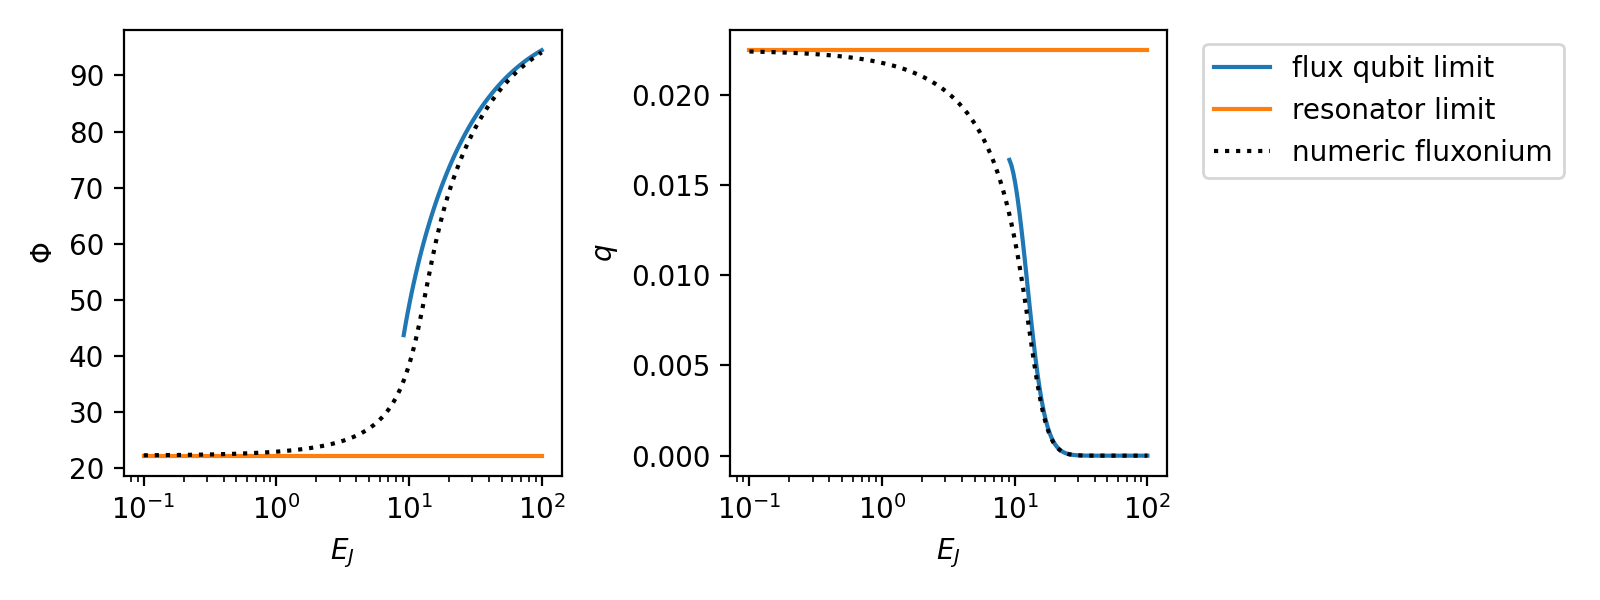

In [235]:
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=[8,3], dpi=200)
ax1.plot(EJ_values[130:], Φ_fq_limit[130:])
ax1.plot(EJ_values, Φ_r_limit*np.ones(len(EJ_values)))
ax1.plot(EJ_values, Φ_n,':k')
ax1.set_ylabel('$\Phi$')
ax1.set_xlabel('$E_J$')
ax1.set_xscale('log')

ax2.plot(EJ_values[130:], q_fq_limit[130:], label='flux qubit limit')
ax2.plot(EJ_values, q_r_limit*np.ones(len(EJ_values)), label='resonator limit')
ax2.plot(EJ_values, q_n,':k', label='numeric fluxonium')
ax2.set_xscale('log')
ax2.set_ylabel('$q$')
ax2.set_xlabel('$E_J$')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.tight_layout()
fig.show()

In [188]:
q_r_limit

0.02247179258788244

In [189]:
EJ_values

array([0.100000000000, 0.103532184330, 0.107189131921, 0.110975249641, 0.114895100019, 0.118953406737, 0.123155060329, 0.127505124071, 0.132008840083, 0.136671635646, 0.141499129743, 0.146497139831, 0.151671688847, 0.157029012473, 0.162575566644, 0.168318035333, 0.174263338601, 0.180418640939,
       0.186791359902, 0.193389175046, 0.200220037182, 0.207292177960, 0.214614119786, 0.222194686094, 0.230043011977, 0.238168555198, 0.246581107582, 0.255290806824, 0.264308148697, 0.273643999707, 0.283309610184, 0.293316627839, 0.303677111804, 0.314403547159, 0.325508859984, 0.337006432927,
       0.348910121341, 0.361234269971, 0.373993730248, 0.387203878181, 0.400880632890, 0.415040475785, 0.429700470432, 0.444878283113, 0.460592204115, 0.476861169771, 0.493704785284, 0.511143348344, 0.529197873596, 0.547890117959, 0.567242606849, 0.587278661319, 0.608022426165, 0.629498899022,
       0.651733960488, 0.674754405311, 0.698587974679, 0.723263389648, 0.748810385759, 0.775259748863, 0.8026433522